In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from singlestock import preprocessdata
from predictor import stockprediction


In [2]:
def drawpredictorrange(pid=0, lookbackrange=range(1,11), usefulldata=True, title='', xlabel=''):
    '''draws the predicted values for a range of parameters
       pid - predictor id (0=SVR, 1=RFR)
       lookbackrange - a list of lookback values
       usefulldata - flag to choose between full data and simple data
    '''

    stocks = [
        'AAPL', 'AMZN', 'GOOG', 'MSFT', 'YHOO', 'SPY'
    ]

    # create a data frame to keep the results for the estimator
    x = pd.DataFrame()
    
    for s in stocks:
        temp = []
        print 'processing ' + s + ' ...'
        for lookback in lookbackrange:
            # find the best estimator for full data
            p = stockprediction(s, lookback, usefulldata)
            p.searchbest(pid)
            [y, score, corr] = p.query(p.xtest, p.ytest, pid)
            temp.append(score)

        x[s] = temp

    x.set_index([lookbackrange], inplace=True)

    plt.figure(figsize=(16,8))
    x.plot()
    plt.ylim([0,1])
    plt.legend()
    plt.title(title)
    plt.xlim([lookbackrange[0], lookbackrange[-1]])
    plt.xticks(lookbackrange)
    plt.xlabel(xlabel)
    plt.show()

processing AAPL ...
AAPL - getting data from yahoo finance
parameters found: {'kernel': 'linear', 'C': 1}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 1}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 1}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 1}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 1}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 0.75}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 0.75}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 0.75}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 0.75}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 0.75}
processing AMZN ...
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 1}
AMZN - data found locally
parameters found: {'kernel': 

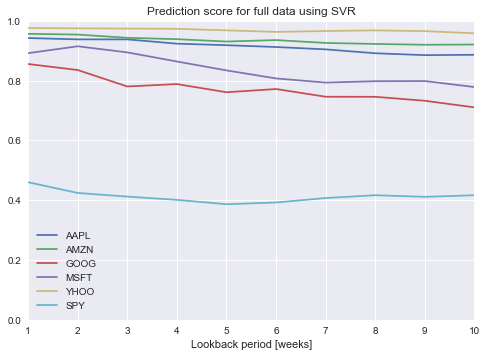

processing AAPL ...
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 5}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 2}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 2}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 10}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 5}
AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 1.5}
processing AMZN ...
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 2}
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 0.5}
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 1.5}


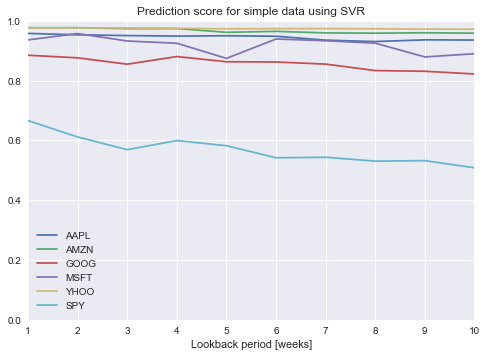

In [3]:
# warning - these two lines will take a very long time to run!
drawpredictorrange(0, usefulldata=True, title='Prediction score for full data using SVR', xlabel='Lookback period [weeks]')
drawpredictorrange(0, usefulldata=False, title='Prediction score for simple data using SVR', xlabel='Lookback period [weeks]')

In [ ]:
# warning - these two lines will take a very long time to run!
drawpredictorrange(1, usefulldata=True, title='Prediction score for full data using RFR', xlabel='Lookback period [weeks]')
drawpredictorrange(1, usefulldata=False, title='Prediction score for simple data using RFR', xlabel='Lookback period [weeks]')

GOOG - data found locally
parameters found: {'kernel': 'linear', 'C': 0.5}
score, correlation: 0.880531918749 0.946415931179


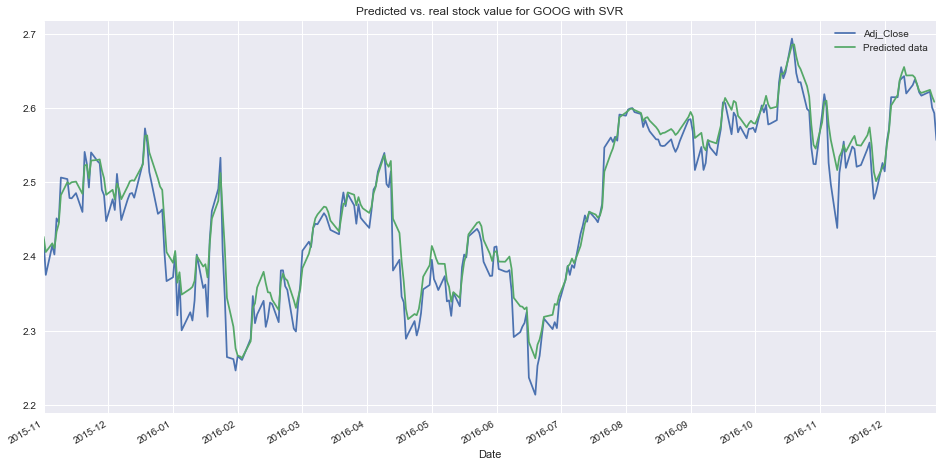

In [4]:
import seaborn

p = stockprediction('GOOG', alldata=False)
pid = 0

myestim = p.searchbest(pid)

[y20, score, corr] = p.query(p.xtest, p.ytest, pid)
print "score, correlation:", score, corr[0,1]


plt.figure(figsize=(16,8))
ax = p.ytest.plot()
y20.shift(-1).plot(label="Predicted data")

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 30))

plt.title('Predicted vs. real stock value for GOOG with SVR')
plt.legend()
plt.show()


AAPL - data found locally
parameters found: {'kernel': 'linear', 'C': 5}
AMZN - data found locally
parameters found: {'kernel': 'linear', 'C': 1.5}
GOOG - data found locally
parameters found: {'kernel': 'linear', 'C': 0.5}
MSFT - data found locally
parameters found: {'kernel': 'linear', 'C': 2}
YHOO - data found locally
parameters found: {'kernel': 'linear', 'C': 0.5}
SPY - data found locally
parameters found: {'kernel': 'linear', 'C': 0.5}


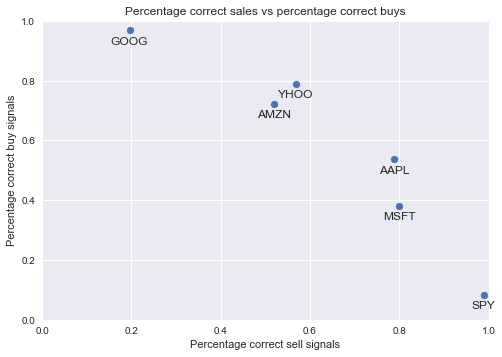

cummultive buy/sell data     buy_bol     buy_ct    buy_pred    buy_real  correct_buy  correct_sell  \
0  2.204594  21.235263  285.548504  519.893658     0.537102      0.787986   
1  0.000000  18.782993  196.377917  482.080500     0.721477      0.520270   
2  0.977220  18.060165   93.737120  416.720717     0.968531      0.195804   
3  0.947249  20.373690   89.726129  383.041780     0.381625      0.800000   
4  3.213789  22.878911  238.290745  458.960000     0.788530      0.568345   
5  0.000000  27.711833   24.104236  387.444434     0.082734      0.989247   

   sales_bol   sales_ct  sales_pred  sales_real  profit_real  profit_pred  \
0   3.592498  22.917941  285.154927  533.444383    13.550725    -0.393577   
1   1.101154  20.674617  198.538106  491.903537     9.823037     2.160189   
2   0.000000  20.471952   95.024366  424.828899     8.108183     1.287246   
3   2.330724  22.366585   89.163381  393.022191     9.980412    -0.562749   
4   0.922364  23.100232  239.370746  469.254328   

In [6]:
from singlestock import evalestim

stocks = [
 'AAPL', 'AMZN', 'GOOG', 'MSFT', 'YHOO', 'SPY'
]

rows = []
for s in stocks:
    p = stockprediction(s, alldata=False)
    p.searchbest(0)
    [sales_real, sales_pred, buy_real, buy_pred, correct_buy, correct_sell, sales_bol, sales_ct, buy_bol, buy_ct] = evalestim(p, s, p.xtrain, p.ytrain)
    
    temp = {}
    temp['sales_real'] = sales_real
    temp['sales_pred'] = sales_pred
    temp['buy_real'] = buy_real
    temp['buy_pred'] = buy_pred
    temp['correct_buy'] = correct_buy
    temp['correct_sell'] = correct_sell
    temp['sales_bol'] = sales_bol
    temp['sales_ct'] = sales_ct
    temp['buy_bol'] = buy_bol
    temp['buy_ct'] = buy_ct
    rows.append(temp)

x = pd.DataFrame(rows)
x.set_index([stocks])

x ['profit_real'] = x['sales_real'] - x['buy_real']
x ['profit_pred'] = x['sales_pred'] - x['buy_pred']
x ['profit_bol'] = x['sales_bol'] - x['buy_bol'] 
x ['profit_ct'] = x['sales_ct'] - x['buy_ct'] 

plt.figure()
plt.scatter(x['correct_sell'], x['correct_buy'])
plt.title('Percentage correct sales vs percentage correct buys')
cnt = 0
for xy in zip(x['correct_sell'], x['correct_buy']):
    plt.annotate(stocks[cnt], xy=(xy[0],xy[1]-0.02), textcoords='data', horizontalalignment='center', verticalalignment='top')
    cnt = cnt + 1
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Percentage correct sell signals')
plt.ylabel('Percentage correct buy signals')
plt.show()

print 'cummultive buy/sell data', x